In [118]:
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from graphviz import Digraph
from networkx import DiGraph

In [119]:
import graphviz
def plot(dot):
    write_dot(dot, "./pic/grid.dot")
    with open("./pic/grid.dot") as f:
        dot_graph = f.read()
    dot_graph=dot_graph.replace('name','label')
    dot2 = graphviz.Source(dot_graph)
    return dot2

In [120]:
class Subgraph():
    def __init__(self, dot):
        
        self.label = ''
        self.head = ''
        self.tail = ''
        self.index = 0
        self.nodes = []
        self.copy_num = 0

    def add_edge(self, a, b, label='xx'):
        if type(a) != str:
            a = a.tail
        if type(b) != str:
            b = b.head
        self.nodes.append([a, b, label])
        dot.add_edge(a, b, name=label)

    def add_node(self, name, shape='circle', color='black'):
        dot.add_node(name, shape=shape, color=color)


def subcopy(sg, dot, start):
    d_temp = Subgraph(dot)
    d_temp.head = f'{start}' + f'cop{sg.copy_num}' + sg.head
    for n in sg.nodes:
        d_temp.add_edge(f'{start}' + f'cop{sg.copy_num}' + n[0], f'{start}' + f'cop{sg.copy_num}' + n[1], n[2])
        start += 1
    d_temp.tail = f'{start - 1}' + f'cop{sg.copy_num}' + sg.tail
    sg.copy_num += 1

    d_temp.label = sg.label

    return d_temp, start

In [121]:
def deal_or(s, stack_sign, dot, start):
    if s == '|':
        a = stack_sign.pop(-1)
        b = stack_sign.pop(-1)
        d = Subgraph(dot)
        d.add_edge(str(start), str(start + 1), label='sgm')
        d.add_edge(str(start), str(start + 2), label='sgm')
        d.add_edge(str(start + 1), b, b.label)
        d.add_edge(str(start + 2), a, a.label)
        d.add_edge(b, str(start + 3), label='sgm')
        d.add_edge(a, str(start + 3), label='sgm')
        d.head = str(start)
        d.tail = str(start + 3)
        d.label = 'sgm'
        start += 4
        stack_sign.append(d)
        return stack_sign, start
        
def deal_attach(s, stack_sign, dot, start):
    if s == '·':
        d = Subgraph(dot)
        b = stack_sign.pop(-1)
        a = stack_sign.pop(-1)
        if a.label=='start':
            d.add_edge(f'{start}', b, label=b.label)
            d.add_edge(a,f'{start}',label='sgm')
            d.head = str(a.head)
            d.tail = str(b.tail)
            d.label = a.label
            print('起始',start)
        else:
            
            d.add_edge(a, b, label=b.label)
            d.head = str(a.head)
            d.tail = str(b.tail)
            d.label = a.label
        
        start += 1
        stack_sign.append(d)
        return stack_sign, start
def deal_dian(s, stack_sign, dot, start):
    if s == '.':
        d = Subgraph(dot)
        a = stack_sign.pop(-1)
        d.add_edge(a, f'{start}', label='!=\  n')
        d.head = str(a.head)
        d.tail = f'{start}'
        d.label=a.label
        start += 1
        stack_sign.append(d)
        return stack_sign, start
        

def deal_bb(s, stack_sign, dot, start):
    if s == '*':
        d = Subgraph(dot)
        a = stack_sign.pop(-1)
        d.add_edge(str(start), a, label='sgm')
        d.add_edge(a, a, label=a.label)
        d.add_edge(a, str(start + 1), label='sgm')
        d.add_edge(str(start), str(start + 1), label='sgm')
        d.head = str(start)
        d.tail = str(start + 1)
        d.label='sgm'
        start+=2
        stack_sign.append(d)
    return stack_sign, start
def deal_zbb(s, stack_sign, dot, start):
    if s == '+':
        d = Subgraph(dot)
        a = stack_sign.pop(-1)
        d.add_edge(str(start), a, label=a.label)
        d.add_edge(a, a, label=a.label)
        d.add_edge(a, str(start + 1), label='sgm')
        d.head = str(start)
        d.tail = str(start + 1)
        d.label='sgm'
        start+=2
        stack_sign.append(d)
    return stack_sign, start
# 花括号
def deal_hkh(s, stack_sign, dot, start):
    if s == '}':
        d = Subgraph(dot)
        c = stack_sign.pop(-1)
        dot.remove_node(c.head)
        m = int(c.label)-1
        a = stack_sign.pop(-1)
        
        cop = ''
        last = a
        for i in range(m):
            cop, start = subcopy(a, dot, start)
            d.add_edge(last, cop, label=cop.label)
            last = cop
        d.head = a.head
        d.tail = last.tail
        d.label=a.label
        stack_sign.append(d)
        return stack_sign, start
# 方括号
def deal_fkh(st):
    Li=0
    remain=[]
    for c in range(0,len(st)):
        p=st[c]
        if c == 0:
            if st[c + 1] != '-':
                remain.append(st[c])
                continue
        if c == len(st)-1 :
            if st[c - 1] != '-':
                remain.append(st[c])
                continue
        if st[c-1]!='-' and st[c+1]!='-' and st[c]!='-':
            remain.append(st[c])
    result=''
    while True:
        try:
            i=st.index('-',Li)
        except:
            break
        if st[i-1].isalpha() and st[i+1].isalpha():
            chars=[]
            L1=ord(st[i-1])
            L2=ord(st[i+1])
            if L1>L2:
                L1,L2=L2,L1
            for k in range(L1,L2+1):
                chars.append(str(chr(k)))
            if len(result)>1:
                result+='|'
            result+= '|'.join(chars)

        if st[i-1].isdigit() and st[i+1].isdigit():
            ints=[]
            L1=int(st[i-1])
            L2=int(st[i+1])
            if L1>L2:
                L1,L2=L2,L1
            for k in range(L1,L2+1):
                ints.append(str(k))
            if len(result)>1:
                result+='|'
            result +=  '|'.join(ints)

        Li=i+1
    if len(result) > 1:
        result += '|'
        result+='|'.join(remain)
        
    return '('+result+')'
    

In [122]:
def deal(s, stack_sign, dot, start):
#  ^ .还没有写
    if s== '·':
        return deal_attach(s, stack_sign, dot, start)
    elif s=='}':
        return deal_hkh(s, stack_sign, dot, start)
    elif s=='|':
        return deal_or(s, stack_sign, dot, start)
    elif s=='+':
        return deal_zbb(s, stack_sign, dot, start)
    elif s=='*':
        return deal_bb(s, stack_sign, dot, start)
    elif s=='.':
        return deal_dian(s, stack_sign, dot, start)

In [123]:
def get_st(zz,index,stack_cal):
    if index+1<len(zz) and zz[index+1].isalpha() :
        stack_cal.append('·')
    elif index+1<len(zz) and zz[index+1]=='(':
        stack_cal.append('·')
    return stack_cal

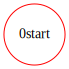

当前stack_cal ['#', '·'] (
剩余 1
当前尾节点 0start 当前头节点 0start 当前节点label start


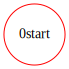

当前stack_cal ['#', '·', '('] a
剩余 1
当前尾节点 0start 当前头节点 0start 当前节点label start


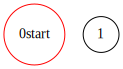

当前stack_cal ['#', '·', '('] *
剩余 2
当前尾节点 1 当前头节点 1 当前节点label a


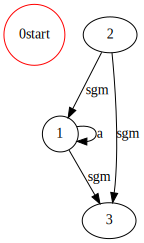

当前stack_cal ['#', '·', '('] |
剩余 2
当前尾节点 3 当前头节点 2 当前节点label sgm


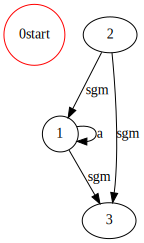

当前stack_cal ['#', '·', '(', '|'] b
剩余 2
当前尾节点 3 当前头节点 2 当前节点label sgm


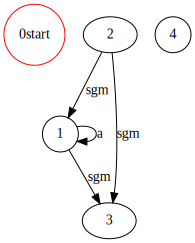

当前stack_cal ['#', '·', '(', '|'] *
剩余 3
当前尾节点 4 当前头节点 4 当前节点label b


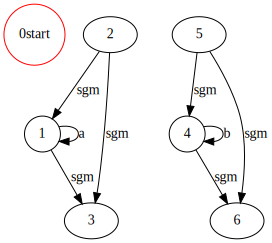

当前stack_cal ['#', '·', '(', '|'] )
剩余 3
当前尾节点 6 当前头节点 5 当前节点label sgm


'('

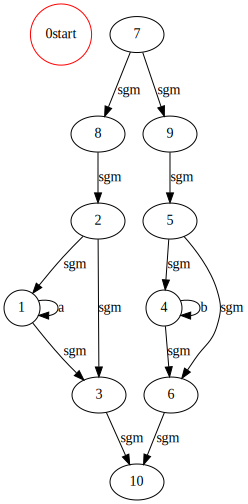

当前stack_cal ['#', '·'] *
剩余 2
当前尾节点 10 当前头节点 7 当前节点label sgm
起始 13


'·'

In [124]:
# '·'表示连接运算符
level = {

    '+': 3, '\\': 5, '|': 1, '*': 4, '.': 2, '?': 3, '{': 3, '}': 3.5, '(': 4, ')': 4.5, '[': 4, ']': 4.5, '^': 2,
    '$': 2,
    '·': 2,
}

# 实例化一个Digraph对象(有向图)，name:生成的图片的图片名，format:生成的图片格式
dot = nx.DiGraph(splines=True)
index = 0
cnt = 1
d = Subgraph(dot=dot)
d.add_node(name=str(0) + 'start',color='red')
d.head = str(0) + 'start'
d.tail = str(0) + 'start'
d.label='start'

# 存储运算符
stack_cal = ['#', '·']
# 存储非运算符 sgm表示空字符
stack_sign = [d]

zz = '(a*|b*)*'
zm=[]
while True:
    s = zz[index]
    plot(dot)
    print('当前stack_cal',stack_cal,s)
    print('剩余',len(stack_sign))
    print('当前尾节点',stack_sign[-1].tail,'当前头节点',stack_sign[-1].head,'当前节点label',stack_sign[-1].label)
    
    if s in ['+', '\\', '|', '*', '.', '?', '{', '}', '(', ')', '[', ']']:
        if level[stack_cal[-1]] < level[s]:
            if s == '}':
                stack_sign, cnt = deal(s, stack_sign, dot, cnt)
                while stack_cal[-1] != '{':
                    stack_sign, cnt = deal_hkh(s, stack_sign, dot, cnt)
               
            elif s == ')':
                stack_sign, cnt = deal(stack_cal.pop(), stack_sign, dot, cnt)
                while stack_cal[-1] != '(':
                    stack_sign, cnt = deal(stack_cal.pop(), stack_sign, dot, cnt)
                stack_cal.pop()
             
            elif s == ']':
                st = ''
                while stack_cal[-1] != '[':
                    st += stack_sign.pop(-1).label
                    stack_cal.pop(-1)
                st = deal_fkh(st)
                if st[-2]=='|':
                    st=st[:-2]+')'
            

                
                for m in st:
                    if m not in level.keys():
                        d = Subgraph(dot)
                        d.add_node(name=f'{cnt}' + f' {m}')
                        d.head = str(cnt) + f' {m}'
                        d.tail = str(cnt) + f' {m}'
                        d.label = m
                        stack_sign.append(d)
                        cnt += 1
                    elif m != ')':
                        stack_cal.append(m)
                     
                    elif m == ')':
                        stack_sign, cnt = deal(stack_cal.pop(), stack_sign, dot, cnt)
                        while stack_cal[-1] != '(':
                            stack_sign, cnt = deal(stack_cal.pop(), stack_sign, dot, cnt)
                        stack_cal.pop()
                       
                stack_cal.pop()
              
            
            elif s in ['(', '[', '{']:
                stack_cal.append(s)
                
            else:
                stack_cal.append(s)
                stack_sign, cnt = deal(stack_cal.pop(), stack_sign, dot, cnt)

        elif level[stack_cal[-1]] == level[s] :
            if stack_cal[-1]==s and s=='(':
                stack_cal.append(s)
            elif stack_cal[-1]!=s :
                stack_cal.append(s)
                stack_sign, cnt = deal(stack_cal.pop(), stack_sign, dot, cnt)
                
            else:
                stack_cal.pop()
        else:
            stack_cal.append(s)
#             右符号的连接
        if s in [')',']','}','*','+','.']:
            stack_cal=get_st(zz,index,stack_cal)

    else:
        stack_cal=get_st(zz,index,stack_cal)
        zm.append(s)
        d = Subgraph(dot)
        d.add_node(name=f'{cnt}')
        d.head = str(cnt) 
        d.tail = str(cnt) 
        d.label = s
        stack_sign.append(d)
        cnt += 1
  
    index += 1
    if index >= len(zz):
        break

while len(stack_cal) != 1 :
    # plot(dot)
    # print('当前尾节点',stack_sign[-1].tail,'当前头节点',stack_sign[-1].head,'当前节点label',stack_sign[-1].label)
    # print('剩余',stack_cal)
    stack_sign, cnt = deal(stack_cal[-1], stack_sign, dot, cnt)
    stack_cal.pop()

In [125]:
z_node=[]
for n in dot.nodes:
    if dot.out_degree(n)==0 and n!='0start':
        z_node.append(n)
        continue
zt_n=z_node[0]

In [126]:
d.add_node(name= 'end',shape='doublecircle')
dot.add_edge(z_node[0],'end',name='sgm')

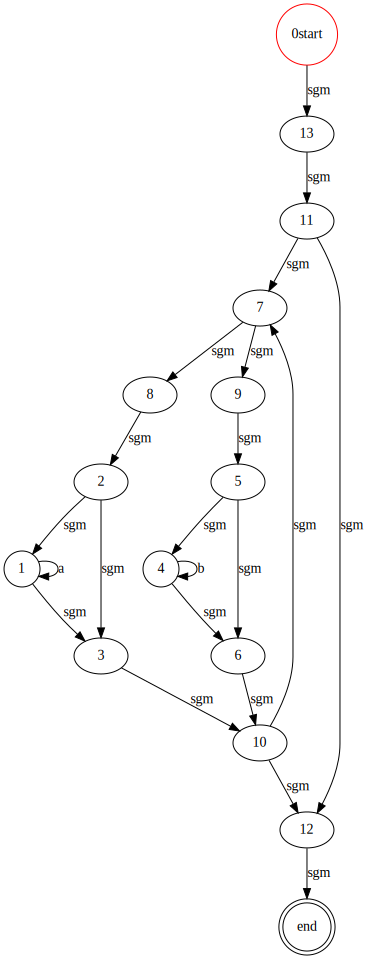

In [127]:
plot(dot)
dot.remove_node('end')

In [128]:
import gc
gc.collect()

12937

# 第二步 NFA->DFA

In [129]:
def get_closure(nn,la,res,dot,gy):
    f=False
    r=dict(dot[nn].items())
    for m,n in zip(r.keys(),r.values()):
        if n['name']==la and m!=nn and m not in gy:
            f=True
            if m not in gy:
                gy.append(m)
            res=get_closure(nn=m,la=la,res=res,dot=dot,gy=gy)
    
    res.append(nn)
    return res

In [130]:
def get_I(nn,la,res,dot):
    f=False
    r=dict(dot[nn].items())
    for m,n in zip(r.keys(),r.values()):
        if n['name']==la :
            f=True
            res.append(m)
    return res
    

In [131]:
dr={}
for n in dot.nodes:
    k=get_closure(n,res=[],la='sgm',dot=dot,gy=[])
    dr[n]=list(set(k))
start=list(dict(dot['0start'].items()).keys())[0]

In [132]:
import pandas as pd
import numpy as np
zm=list(set(zm))
df=pd.DataFrame()
df=pd.DataFrame(np.zeros(len(zm)+1))
df=df.T
df.columns=['sgmlist']+zm
df.iloc[0,0]='['+','.join(dr[start])+']'

In [133]:
n_index=0
new_=1
while True:
    change=False
    for z in zm:
        move=[]
        for m in eval(df.iloc[n_index,0]):
            t=list(set(get_I(str(m),res=[],la=z,dot=dot)))
            move+=t
        move=list(set(move))
        
        res=[]
        for m in move:
            res+=dr[m]
        df.loc[n_index,z]='['+','.join(res)+']'
       
        
        if df.loc[n_index,z] not in df.iloc[:,0].unique():
            change=True
            df.loc[new_,'sgmlist']='['+','.join(res)+']'
            new_+=1
    if not change and len(df[df[zm[0]].isna()])==0 :
        break
    n_index+=1
        

In [134]:
zt_p=df.loc[:,'sgmlist'].apply(lambda x : zt_n in x)
ct_p=df.loc[:,'sgmlist'].apply(lambda x : start in x)

In [135]:
pre_sgm=df['sgmlist']

In [136]:
df

,sgmlist,a,b
0,"[11,3,5,13,9,6,8,7,10,4,12,2,1]","[3,5,9,6,8,7,10,4,12,2,1]","[3,5,9,6,8,7,10,4,12,2,1]"
1,"[3,5,9,6,8,7,10,4,12,2,1]","[3,5,9,6,8,7,10,4,12,2,1]","[3,5,9,6,8,7,10,4,12,2,1]"


In [137]:
from sklearn.preprocessing import LabelEncoder
La=LabelEncoder()

for i in range(len(df.columns)):
    df.iloc[:,i]=df.iloc[:,i].astype(str)
    if i==0:
        df.iloc[:,i]=La.fit_transform(df.iloc[:,i])
    else:
        df.iloc[:,i]=La.transform(df.iloc[:,i])
        

In [138]:
if '[]' in list(pre_sgm):
    kong=La.transform(['[]'])[0]
else:
    kong=''

In [139]:
# 连接点是否不全为空点
def add(i,kong):
    for j in range(1,len(i)):
        if j!=kong:
            return True
    return False

In [140]:
dot2 = nx.DiGraph(splines=True)
cnt=0
# 确定终态和初态
zt_nodes=[]
ct_nodes=[]
zm_new=[]
for i in df.values:
    if i[0]!=kong:
        if zt_p[cnt]:
            if add(i,kong):
                dot2.add_node(str(i[0]),shape='doublecircle')
                zt_nodes.append(str(i[0]))
        elif ct_p[cnt]:
            if add(i,kong):
                dot2.add_node(str(i[0]),color='red')
                ct_nodes.append(str(i[0]))
        
        cnt+=1
        for j in range(1,len(i)):
            if i[j]!=kong and i[0]!=kong:
                if dot2.has_edge(str(i[0]), str(i[j])):
                    zm[j-1]+=' or '+dot2[str(i[0])][str(i[j])]['name']
                if zm[j-1] not in zm_new:
                    zm_new.append(zm[j-1])
                dot2.add_edge(str(i[0]),str(i[j]),name=zm[j-1])

In [141]:
kong

''

In [142]:
df

,sgmlist,a,b
0,0,1,1
1,1,1,1


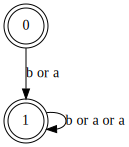

In [143]:
plot(dot2)

# DFA的最小化

## 终态的定义：自连接的状态，由其他终态指向的状态、出度为0的状态

In [144]:
# dot2=nx.DiGraph()
# # 书上的测试数据
# dot2.add_edge('S','A',name='a')
# dot2.add_edge('S','B',name='b')
# dot2.add_edge('A','B',name='b')
# dot2.add_edge('B','A',name='a')
# dot2.add_edge('A','C',name='a')
# dot2.add_edge('B','D',name='b')
# dot2.add_edge('C','C',name='a')
# dot2.add_edge('C','E',name='b')
# dot2.add_edge('D','D',name='b')
# dot2.add_edge('D','F',name='a')
# dot2.add_edge('E','D',name='b')
# dot2.add_edge('E','F',name='a')
# dot2.add_edge('F','C',name='a')
# dot2.add_edge('F','E',name='b')
# plot(dot2)

In [145]:
def reverse_dict(dic):
    
    v=dic.values()
    nd={}
    for (a,s) in dic.items():
        if s in nd.keys():
            nd[s].append(a)
        else:
            nd[s]=[a]
    return nd
    

In [146]:
fzt_node=[]
zm=zm_new
for n in dot2.nodes:
    if n not in zt_nodes:
        fzt_node.append(n)

In [147]:
zm

['a', 'b or a', 'b or a or a']

In [148]:
if len(fzt_node)>=1:
    zj=[fzt_node,zt_nodes]
else:
    zj=[zt_nodes]
print(zj)

[['0', '1']]


In [149]:
zm

['a', 'b or a', 'b or a or a']

In [150]:
def get_fizj(zj,dot2):
    while True:
        change_c=False
        for z in zm:
            cnt=0
            zj2=[]
            for m in zj.copy():
                change_c2=False
                if len(m)==1:
                    zj2.extend([m])
                    continue
                change={}
                m_new=[]
                dt={}
                for k in m:
                    e=get_I(str(k),la=z,res=[],dot=dot2)
                    print('k e',k,e)
                    if e!=[]:
                        dt[f'{k}']=e[0]
                        if e[0] not in m:
                            
                            change[str(k)]=e[0]
                            print(m,e)
                            change_c=True
                            change_c2=True
                        else:
                            m_new.append(str(k))
                    else:
                        dt[f'{k}']='kong'
                dt_verse=reverse_dict(change)
                if change_c2:
                    change_list=list(dt_verse.values())
                    if len(m_new)>=1:
                        
                        new_z=[m_new]+change_list
                        zj2.extend(new_z)
                        
                    else:
                        
                        chl2=[]
                        for c in change_list:
                            if len(c)>1:
                                for p in c:
                                    chl2.append([p])
                            else:
                                chl2.append(c)
                        new_z=chl2
                        zj2.extend(new_z)
                        
                    
                else:
                    zj2.extend([m])
                    cnt+=1
            print('zj2',zj2,z)
            zj=zj2

        if not change_c:
            return zj2

In [151]:
zj

[['0', '1']]

In [152]:
# 最终子集 
zj=get_fizj(zj,dot2)
zj

k e 0 []
k e 1 []
zj2 [['0', '1']] a
k e 0 ['1']
k e 1 []
zj2 [['0', '1']] b or a
k e 0 []
k e 1 ['1']
zj2 [['0', '1']] b or a or a


[['0', '1']]

In [153]:
t_dic={}
for j in zj:
    if len(j)>1:
        for l in j:
            t_dic[l]=j[0]
    elif len(j)==1:
        t_dic[j[0]]=j[0]

In [154]:
dot_f=nx.DiGraph()

In [155]:
t_dic

{'0': '0', '1': '0'}

In [156]:
kk=[]

dr={}
dy={}
for z in zm:
    for n in dot2.nodes:
        k=get_I(n,res=[],la=z,dot=dot2)
        if len(k)>0:
#             if n in t_dic.keys():
            k=list(set(k))[0]
            kk.append(f'{t_dic[n]}_{t_dic[k]}_{z}')

In [157]:
kk=list(set(kk))

In [158]:
kk

['0_0_b or a or a', '0_0_b or a']

In [159]:
for n in ct_nodes:
    if n in list(t_dic.values()):
        dot_f.add_node(n,color='red')
for n in zt_nodes:
    if n in list(t_dic.values()):
        dot_f.add_node(n,shape='doublecircle')

In [160]:
for k in kk:
    k=k.split('_')
    if k[0]==k[1]:
        if dot_f.has_edge(k[0], k[1]):
            k[2]+=' or '+dot_f[k[0]][k[1]]['name']
        dot_f.add_edge(k[0],k[1],name=k[2])
    

In [161]:
# z_node=[]
# for n in dot_f.nodes:
#     if dot.in_degree(n)==0 :
#         dot_f.add_edge('start',n,)
        
        
        

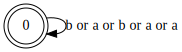

In [162]:
plot(dot_f)